In [3]:
#khai báo thư viện
import pandas as pd #đọc dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
import numpy as np #xử lý dữ liệu
from sklearn.preprocessing import MinMaxScaler #chuẩn hoá dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình
#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra
#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #do mức độ phù hợp
from sklearn.metrics import mean_absolute_error #do sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo phần trăm sai số tuyệt đối trung bình

In [4]:
df = pd.read_csv('data/FPT.csv')

In [5]:
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


In [12]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format = "%m/%d/%Y %H:%M")

In [13]:
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 00:09:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 00:09:16,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 00:09:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 00:09:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 00:09:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,2020-12-22 00:14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,2020-12-22 00:14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,2020-12-22 00:14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,2020-12-22 00:14:29,58.10,58.10,58.10,58.10,2500,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB


In [16]:
df.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [18]:
df1 = pd.DataFrame(df,columns = ['Date/Time', 'Close'])
df1.index = df1['Date/Time']
df1.drop('Date/Time', axis = 1, inplace = True)

In [19]:
df1

,Close
Date/Time,
2018-12-25 00:09:15,30.89
2018-12-25 00:09:16,30.81
2018-12-25 00:09:17,30.74
2018-12-25 00:09:18,30.74
2018-12-25 00:09:19,30.74
...,...
2020-12-22 00:14:24,58.20
2020-12-22 00:14:25,58.20
2020-12-22 00:14:26,58.20


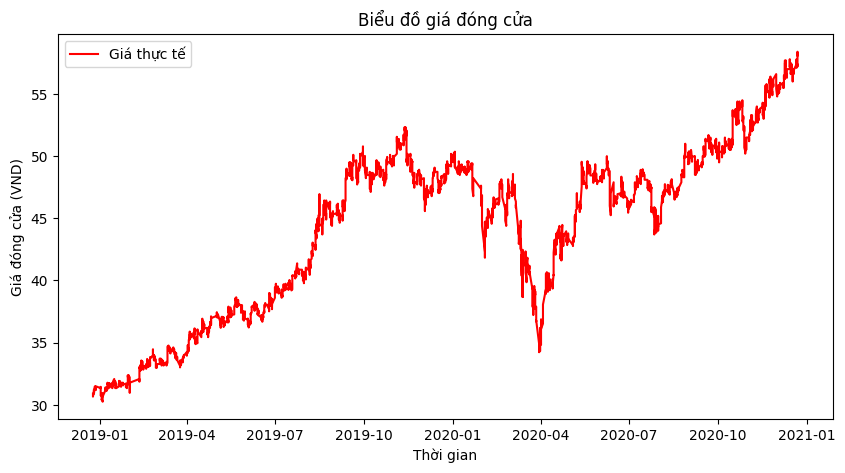

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df1['Close'], label = 'Giá thực tế', color = 'red')
plt.title('Biểu đồ giá đóng cửa')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VND)')
plt.legend()
plt.show()

In [21]:
97406*80/100

77924.8

In [22]:
data = df1.values
train_data = data[:77925]
test_data = data[77925:]

In [42]:
data

array([[30.89],
       [30.81],
       [30.74],
       ...,
       [58.2 ],
       [58.1 ],
       [58.1 ]])

In [24]:
sc = MinMaxScaler(feature_range = (0,1))
sc_train = sc.fit_transform(data)

In [28]:
x_train, y_train = [],[]
for i in range(50,len(train_data)):
    x_train.append(sc_train[i-50:i,0])
    y_train.append(sc_train[i,0])

In [29]:
x_train

[array([0.02273535, 0.01989343, 0.01740675, 0.01740675, 0.01740675,
        0.01740675, 0.01456483, 0.03055062, 0.03339254, 0.03339254,
        0.03197158, 0.03055062, 0.03055062, 0.03055062, 0.03339254,
        0.03339254, 0.03055062, 0.03445826, 0.03445826, 0.02806394,
        0.02806394, 0.02522202, 0.02522202, 0.02522202, 0.02522202,
        0.02273535, 0.02273535, 0.02522202, 0.02273535, 0.02273535,
        0.02522202, 0.02522202, 0.02806394, 0.03339254, 0.03055062,
        0.03197158, 0.03197158, 0.03055062, 0.03055062, 0.03055062,
        0.03055062, 0.03339254, 0.03339254, 0.03339254, 0.03055062,
        0.03055062, 0.03055062, 0.03055062, 0.03055062, 0.03197158]),
 array([0.01989343, 0.01740675, 0.01740675, 0.01740675, 0.01740675,
        0.01456483, 0.03055062, 0.03339254, 0.03339254, 0.03197158,
        0.03055062, 0.03055062, 0.03055062, 0.03339254, 0.03339254,
        0.03055062, 0.03445826, 0.03445826, 0.02806394, 0.02806394,
        0.02522202, 0.02522202, 0.02522202, 0.

In [30]:
y_train

[0.03197158081705154,
 0.030550621669626965,
 0.03197158081705154,
 0.030550621669626965,
 0.03197158081705154,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.03197158081705154,
 0.03197158081705154,
 0.03197158081705154,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.029129662522202615,
 0.029129662522202615,
 0.029129662522202615,
 0.029129662522202615,
 0.029129662522202615,
 0.028063943161634075,
 0.029129662522202615,
 0.028063943161634075,
 0.029129662522202615,
 0.028063943161634075,
 0.030550621669626965,
 0.030550621669626965,
 0.030550621669626965,
 0.028063943161634075,
 0.028063943161634075,
 0.026642984014209725,
 0.028063943161634075,
 0.028063943161634075,
 0.025222024866785153,
 0.025222024866785153,
 0.025222024866785153,
 0.024156305506216835,
 0.025222024866785153,
 0.025222024866785153,
 0.02806394316163

In [34]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))


In [35]:
model = Sequential()
model.add(LSTM(units = 128, input_shape = (x_train.shape[1],1), return_sequences = True))
model.add(LSTM(units = 64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss = 'mean_absolute_error', optimizer = 'adam')

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
save_model = "output/save_model1.keras"
best_model = ModelCheckpoint(save_model, monitor='loss',verbose=2,save_best_only = True, mode = 'auto')
model.fit(x_train, y_train, epochs = 100, batch_size = 50, verbose = 2, callbacks = [best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.03501, saving model to output/save_model1.keras
1558/1558 - 92s - 59ms/step - loss: 0.0350
Epoch 2/100

Epoch 2: loss improved from 0.03501 to 0.02088, saving model to output/save_model1.keras
1558/1558 - 85s - 54ms/step - loss: 0.0209
Epoch 3/100

Epoch 3: loss improved from 0.02088 to 0.01910, saving model to output/save_model1.keras
1558/1558 - 78s - 50ms/step - loss: 0.0191
Epoch 4/100

Epoch 4: loss improved from 0.01910 to 0.01865, saving model to output/save_model1.keras
1558/1558 - 78s - 50ms/step - loss: 0.0186
Epoch 5/100

Epoch 5: loss improved from 0.01865 to 0.01849, saving model to output/save_model1.keras
1558/1558 - 76s - 49ms/step - loss: 0.0185
Epoch 6/100

Epoch 6: loss improved from 0.01849 to 0.01824, saving model to output/save_model1.keras
1558/1558 - 77s - 50ms/step - loss: 0.0182
Epoch 7/100

Epoch 7: loss improved from 0.01824 to 0.01824, saving model to output/save_model1.keras
1558/1558 - 79s - 51ms/step - lo

1558/1558 - 92s - 59ms/step - loss: 0.0175
Epoch 74/100

Epoch 74: loss did not improve from 0.01741
1558/1558 - 92s - 59ms/step - loss: 0.0175
Epoch 75/100

Epoch 75: loss did not improve from 0.01741
1558/1558 - 90s - 58ms/step - loss: 0.0174
Epoch 76/100

Epoch 76: loss improved from 0.01741 to 0.01741, saving model to output/save_model1.keras
1558/1558 - 93s - 60ms/step - loss: 0.0174
Epoch 77/100

Epoch 77: loss did not improve from 0.01741
1558/1558 - 93s - 60ms/step - loss: 0.0174
Epoch 78/100

Epoch 78: loss did not improve from 0.01741
1558/1558 - 90s - 58ms/step - loss: 0.0175
Epoch 79/100

Epoch 79: loss improved from 0.01741 to 0.01738, saving model to output/save_model1.keras
1558/1558 - 83s - 53ms/step - loss: 0.0174
Epoch 80/100

Epoch 80: loss did not improve from 0.01738
1558/1558 - 84s - 54ms/step - loss: 0.0175
Epoch 81/100

Epoch 81: loss improved from 0.01738 to 0.01736, saving model to output/save_model1.keras
1558/1558 - 86s - 55ms/step - loss: 0.0174
Epoch 82/10

In [54]:
y_train = sc.inverse_transform(y_train)
final_model = load_model('output/save_model1.keras')
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)

2434/2434 ━━━━━━━━━━━━━━━━━━━━ 46s 19ms/step


In [55]:
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50, test.shape[0]):
    x_test.append(sc_test[i-50:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

y_test = data[77925:]
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

609/609 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step


C:\Users\Admin\AppData\Local\Temp\ipykernel_13492\4210784649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['dự đoán'] = y_train_predict #thêm dữ liệu
C:\Users\Admin\AppData\Local\Temp\ipykernel_13492\4210784649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['dự đoán']=y_test_predict #thêm dữ liệu


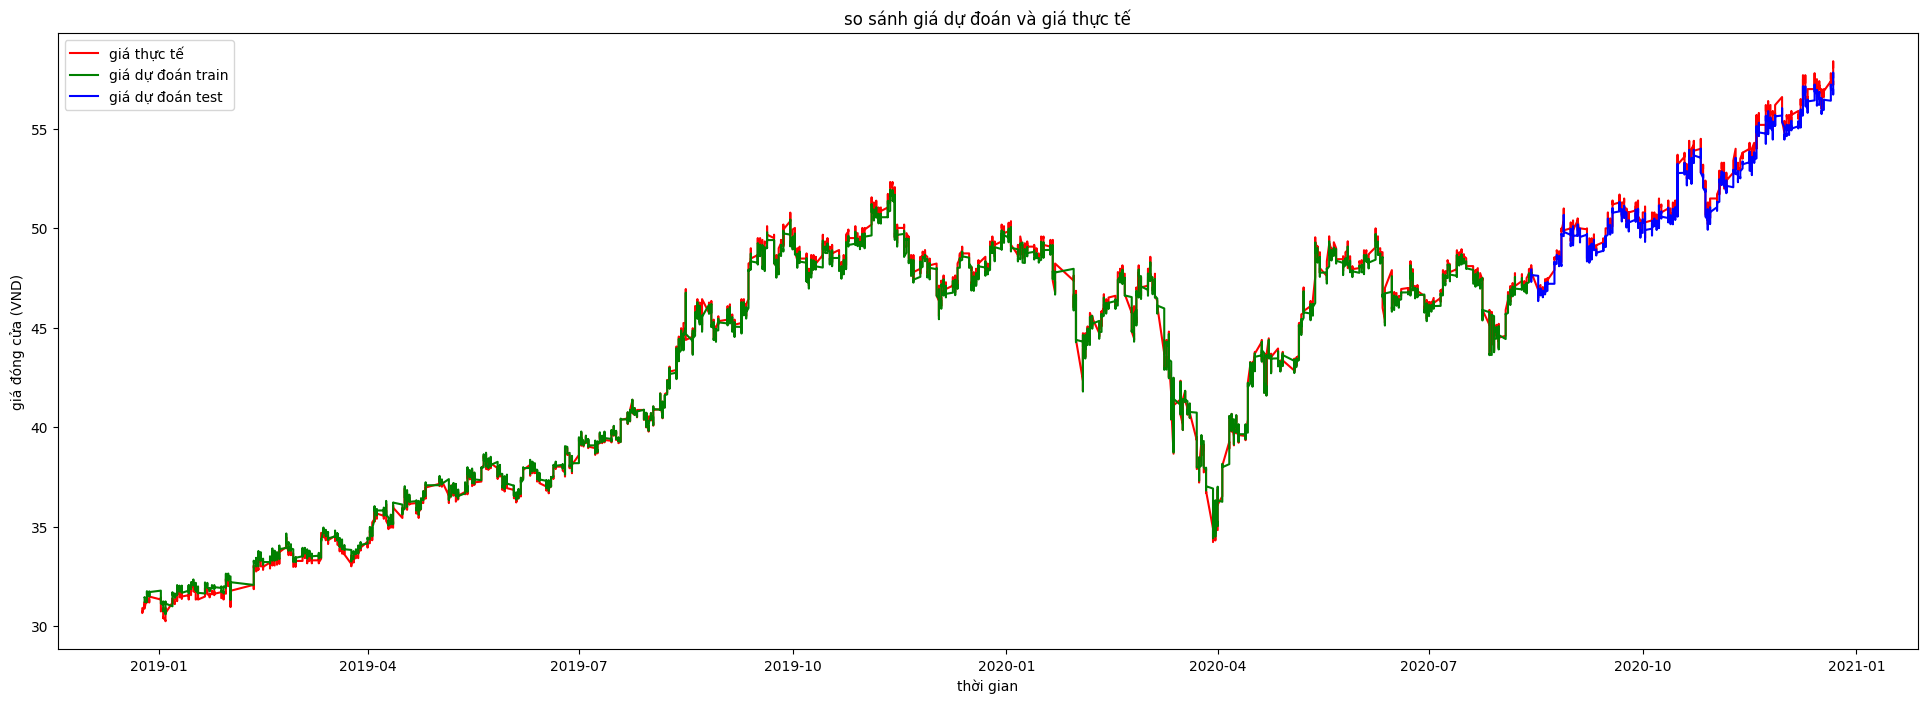

In [57]:
train_data1 = df1[50:77925]
test_data1 = df1[77925:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='giá thực tế',color='red') #đường giá thực
train_data1['dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['dự đoán'],label='giá dự đoán train',color='green') #đường giá dự báo train
test_data1['dự đoán']=y_test_predict #thêm dữ liệu
plt.plot(test_data1["dự đoán"],label='giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('so sánh giá dự đoán và giá thực tế') #đặt tên biểu đồ
plt.xlabel('thời gian') #đặt tên hàm x
plt.ylabel('giá đóng cửa (VND)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [58]:
print('Do phu hop tap train: ', r2_score(y_train, y_train_predict))
print('Sai so tuyet doi trung binh tap train: ', mean_absolute_error(y_train, y_train_predict))
print('Phan tram sai so tuyet doi trung binh tap train: ', mean_absolute_percentage_error(y_train, y_train_predict))

Do phu hop tap train:  -56.937327647531916
Sai so tuyet doi trung binh tap train:  1205.3304246367848
Phan tram sai so tuyet doi trung binh tap train:  0.9653875997469868


In [59]:
train_data1

,Close,dự đoán
Date/Time,,
2018-12-26 00:10:19,31.15,31.462463
2018-12-26 00:10:20,31.11,31.462708
2018-12-26 00:10:21,31.15,31.427164
2018-12-26 00:10:22,31.11,31.462072
2018-12-26 00:10:23,31.15,31.425018
...,...,...
2020-08-14 00:09:29,47.95,47.743767
2020-08-14 00:09:30,47.95,47.744385
2020-08-14 00:09:31,48.00,47.744545


In [60]:
print('Do phu hop tap test: ', r2_score(y_test, y_test_predict))
print('Sai so tuyet doi trung binh tap test: ', mean_absolute_error(y_test, y_test_predict))
print('Phan tram sai so tuyet doi trung binh tap test: ', mean_absolute_percentage_error(y_test, y_test_predict))

Do phu hop tap test:  0.9824650270626876
Sai so tuyet doi trung binh tap test:  0.3638965470597127
Phan tram sai so tuyet doi trung binh tap test:  0.006871742269670253


In [61]:
test_data1

,Close,dự đoán
Date/Time,,
2020-08-14 00:09:34,48.10,47.869072
2020-08-14 00:09:35,48.10,47.886124
2020-08-14 00:09:36,48.10,47.890350
2020-08-14 00:09:37,48.15,47.891491
2020-08-14 00:09:38,48.15,47.929668
...,...,...
2020-12-22 00:14:24,58.20,57.600437
2020-12-22 00:14:25,58.20,57.623604
2020-12-22 00:14:26,58.20,57.638115
